# Machine Learning and Everything Involved (Review)
**Jhun Brian Andam DS4A**

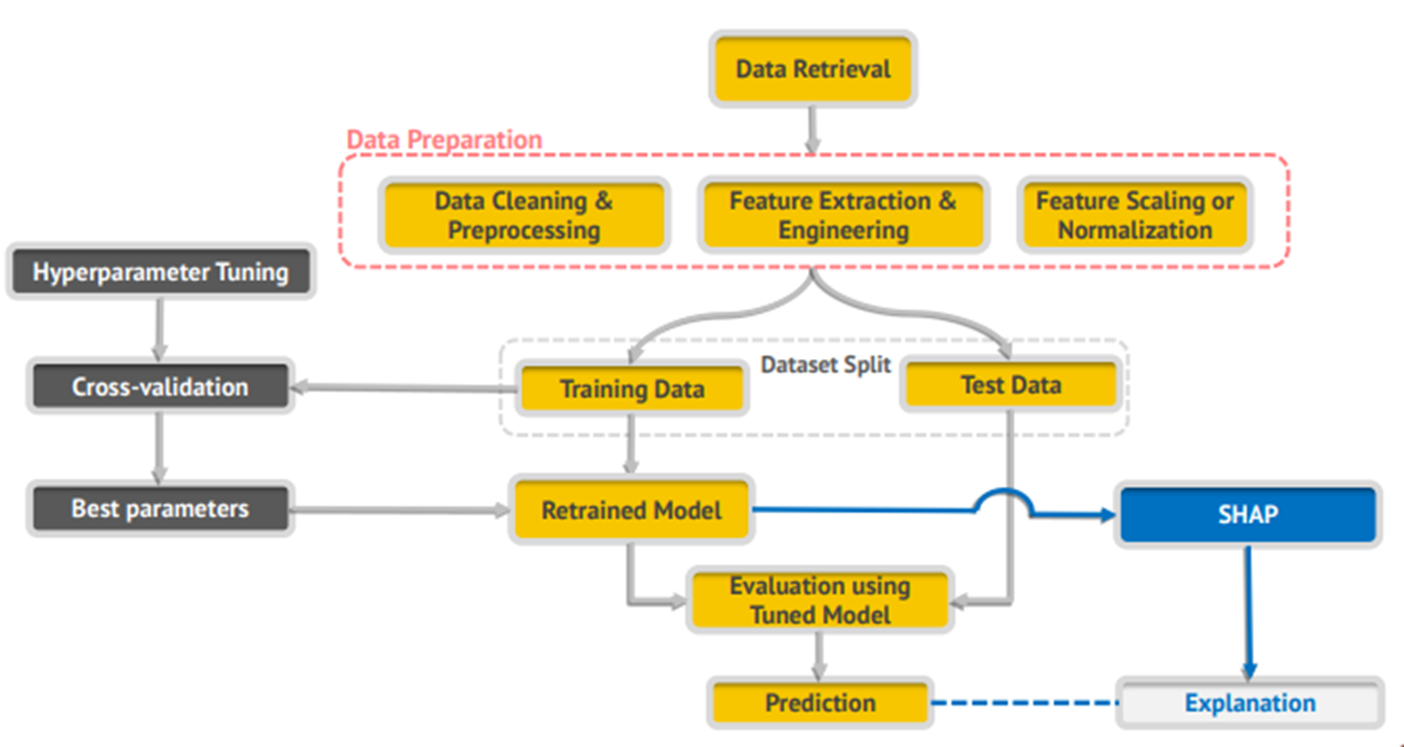

# Import Libraries

In [326]:
from IPython.display import HTML, display
# For browser display only

# display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
import pandas as pd
# Data analysis and manipulation tool (used for making Series and DataFrame, reading csv and excel files etc.) 

import numpy as np
# Linear Algebra, used for matrices (matrix) and arrays etc.

import seaborn as sns
# Visualization library based on matplotlib

import matplotlib.pyplot as plt
# Visualization library

# Pandas Objects and Functions

**Making a `Series` object** <br>
A pandas Series is a one-dimensional labelled data structure which can hold data such as strings, integers and even other Python objects.

In [55]:
display(pd.DataFrame([a,b]).T)

display(pd.concat([a,b], axis=1))

small_letters big_letters
0             a           A
1             b           B
2             c           C
3             d           D
4             e           E
5             f           F
6             g           G
7             h           H
8             i           I
9             j           J

small_letters big_letters
0             a           A
1             b           B
2             c           C
3             d           D
4             e           E
5             f           F
6             g           G
7             h           H
8             i           I
9             j           J

**Making a `DataFrame` object** <br>
Two-dimensional, size-mutable, potentially heterogeneous tabular data. Data structure also contains labeled axes (rows and columns).

In [57]:
dataframe = pd.DataFrame({
    'small_letters':['a','b','c','d','e','f','g','h','i','j'],
    'big_letters':['A','B','C','D','E','F','G','H','I','J']
})
dataframe

small_letters big_letters
0             a           A
1             b           B
2             c           C
3             d           D
4             e           E
5             f           F
6             g           G
7             h           H
8             i           I
9             j           J

**Accessing Data in a `DataFrame`**

In [61]:
dataframe['big_letters']

0    A
1    B
2    C
3    D
4    E
5    F
6    G
7    H
8    I
9    J
Name: big_letters, dtype: object

In [65]:
dataframe[['big_letters']]

big_letters
0           A
1           B
2           C
3           D
4           E
5           F
6           G
7           H
8           I
9           J

**Iterate through a column in a `DataFrame`**

In [68]:
for i in dataframe['big_letters']:
    print(i, type(i))

A <class 'str'>
B <class 'str'>
C <class 'str'>
D <class 'str'>
E <class 'str'>
F <class 'str'>
G <class 'str'>
H <class 'str'>
I <class 'str'>
J <class 'str'>


# Load Dataset (Facebook Spam)

In [161]:
data = pd.read_csv('Facebook Spam Dataset.csv')
data.head()

profile id  #friends  #following  #community  age  #postshared  #urlshared  \
0           1        39         300         907  200         1000         850   
1           2       150         350          30  300          300         100   
2           3       300         450          50  465          500         150   
3           4        25         110         660  350         2050        2000   
4           5        24         100         150  800          950        1000   

   #photos/videos    fpurls  fpphotos/videos  avgcomment/post  likes/post  \
0             922  0.490000         0.550000             0.56        0.47   
1             290  0.330000         0.960000             0.50        1.20   
2             450  0.200000         0.840000             0.40        1.50   
3            2050  0.975610         1.000000             0.70        0.30   
4             900  1.052632         0.947368             0.66        0.50   

   tags/post  #tags/post  Label  
0         40          14      1  
1         10           4      0  
2         15           7      0  
3         54          21      1  
4         55          20      1

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   profile id       600 non-null    int64  
 1   #friends         600 non-null    int64  
 2   #following       600 non-null    int64  
 3   #community       600 non-null    int64  
 4   age              600 non-null    int64  
 5   #postshared      600 non-null    int64  
 6   #urlshared       600 non-null    int64  
 7   #photos/videos   600 non-null    int64  
 8   fpurls           598 non-null    float64
 9   fpphotos/videos  600 non-null    float64
 10  avgcomment/post  600 non-null    float64
 11  likes/post       600 non-null    float64
 12  tags/post        600 non-null    int64  
 13  #tags/post       600 non-null    int64  
 14  Label            600 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 70.4 KB


### Data Preprocessing
* Data quality assessment.
* Data cleaning.
* Data transformation.
* Data reduction.

In [163]:
data = data.dropna()
data = data.reset_index(drop=True)
data

profile id  #friends  #following  #community   age  #postshared  \
0             1        39         300         907   200         1000   
1             2       150         350          30   300          300   
2             3       300         450          50   465          500   
3             4        25         110         660   350         2050   
4             5        24         100         150   800          950   
..          ...       ...         ...         ...   ...          ...   
593         597        83          29         510  2000         2994   
594         598        93          28         563  2500         3420   
595         599        33          27        1000   900         1945   
596         600       100          26        1500   800         1876   
597         601        25          17         730  1560         2002   

     #urlshared  #photos/videos    fpurls  fpphotos/videos  avgcomment/post  \
0           850             922  0.490000         0.550000            0.560   
1           100             290  0.330000         0.960000            0.500   
2           150             450  0.200000         0.840000            0.400   
3          2000            2050  0.975610         1.000000            0.700   
4          1000             900  1.052632         0.947368            0.660   
..          ...             ...       ...              ...              ...   
593        1876            2990  0.626587         0.998664            0.768   
594        2364            3415  0.691228         0.998538            0.659   
595        1520            1936  0.781491         0.995373            0.999   
596        1320            1874  0.703625         0.998934            1.000   
597        1546            2000  0.772228         0.999001            0.800   

     likes/post  tags/post  #tags/post  Label  
0         0.470         40          14      1  
1         1.200         10           4      0  
2         1.500         15           7      0  
3         0.300         54          21      1  
4         0.500         55          20      1  
..          ...        ...         ...    ...  
593       0.154         49          26      1  
594       0.165         47          25      1  
595       0.122         45          23      1  
596       0.102         46          21      0  
597       0.150         52          27      0  

[598 rows x 15 columns]

### (EDA) Descriptive Analysis 
Descriptive Analysis is the type of analysis of data that helps describe, show or summarize data points in a constructive way such that patterns might emerge that fulfill every condition of the data. It is one of the most important steps for conducting statistical data analysis.
* Mean
* Median
* Mode
* Standard Deviation
* Variance
* Correlation
* Kernel Density Plot (KDE)
* Histogram
* Scatter Plot

In [164]:
data.describe().T

count         mean         std         min         25%  \
profile id       598.0   301.326087  174.000902    1.000000  150.250000   
#friends         598.0  1066.866221  670.550467    4.000000  662.500000   
#following       598.0  1069.219064  678.320404    1.000000  658.000000   
#community       598.0   208.209030  371.114187   12.000000   39.000000   
age              598.0  1215.540134  471.757285  125.000000  927.750000   
#postshared      598.0  1158.911371  836.798450   76.000000  586.750000   
#urlshared       598.0   370.926421  721.001542   11.000000   38.000000   
#photos/videos   598.0  1121.464883  837.494505   65.000000  563.250000   
fpurls           598.0     0.187524    0.251282    0.011226    0.042236   
fpphotos/videos  598.0     0.961016    0.145378    0.000000    0.930326   
avgcomment/post  598.0     1.593706   27.175277    0.000000    0.268500   
likes/post       598.0     0.881892    0.504581    0.102000    0.456000   
tags/post        598.0    40.112040   15.959092   10.000000   30.000000   
#tags/post       598.0    16.005017    6.444582    1.000000   12.000000   
Label            598.0     0.172241    0.377906    0.000000    0.000000   

                         50%          75%          max  
profile id        302.500000   451.750000   601.000000  
#friends         1160.500000  1475.250000  5554.000000  
#following       1134.000000  1481.250000  5312.000000  
#community         56.000000    77.000000  1789.000000  
age              1141.500000  1452.750000  2697.000000  
#postshared       876.500000  1410.000000  3896.000000  
#urlshared         49.000000    83.000000  2956.000000  
#photos/videos    821.500000  1380.000000  3891.000000  
fpurls              0.076777     0.132287     1.086957  
fpphotos/videos     0.969819     0.992958     2.739726  
avgcomment/post     0.456000     0.630000   665.000000  
likes/post          0.880000     1.230000     2.800000  
tags/post          39.000000    47.000000    99.000000  
#tags/post         15.500000    19.750000    32.000000  
Label               0.000000     0.000000     1.000000

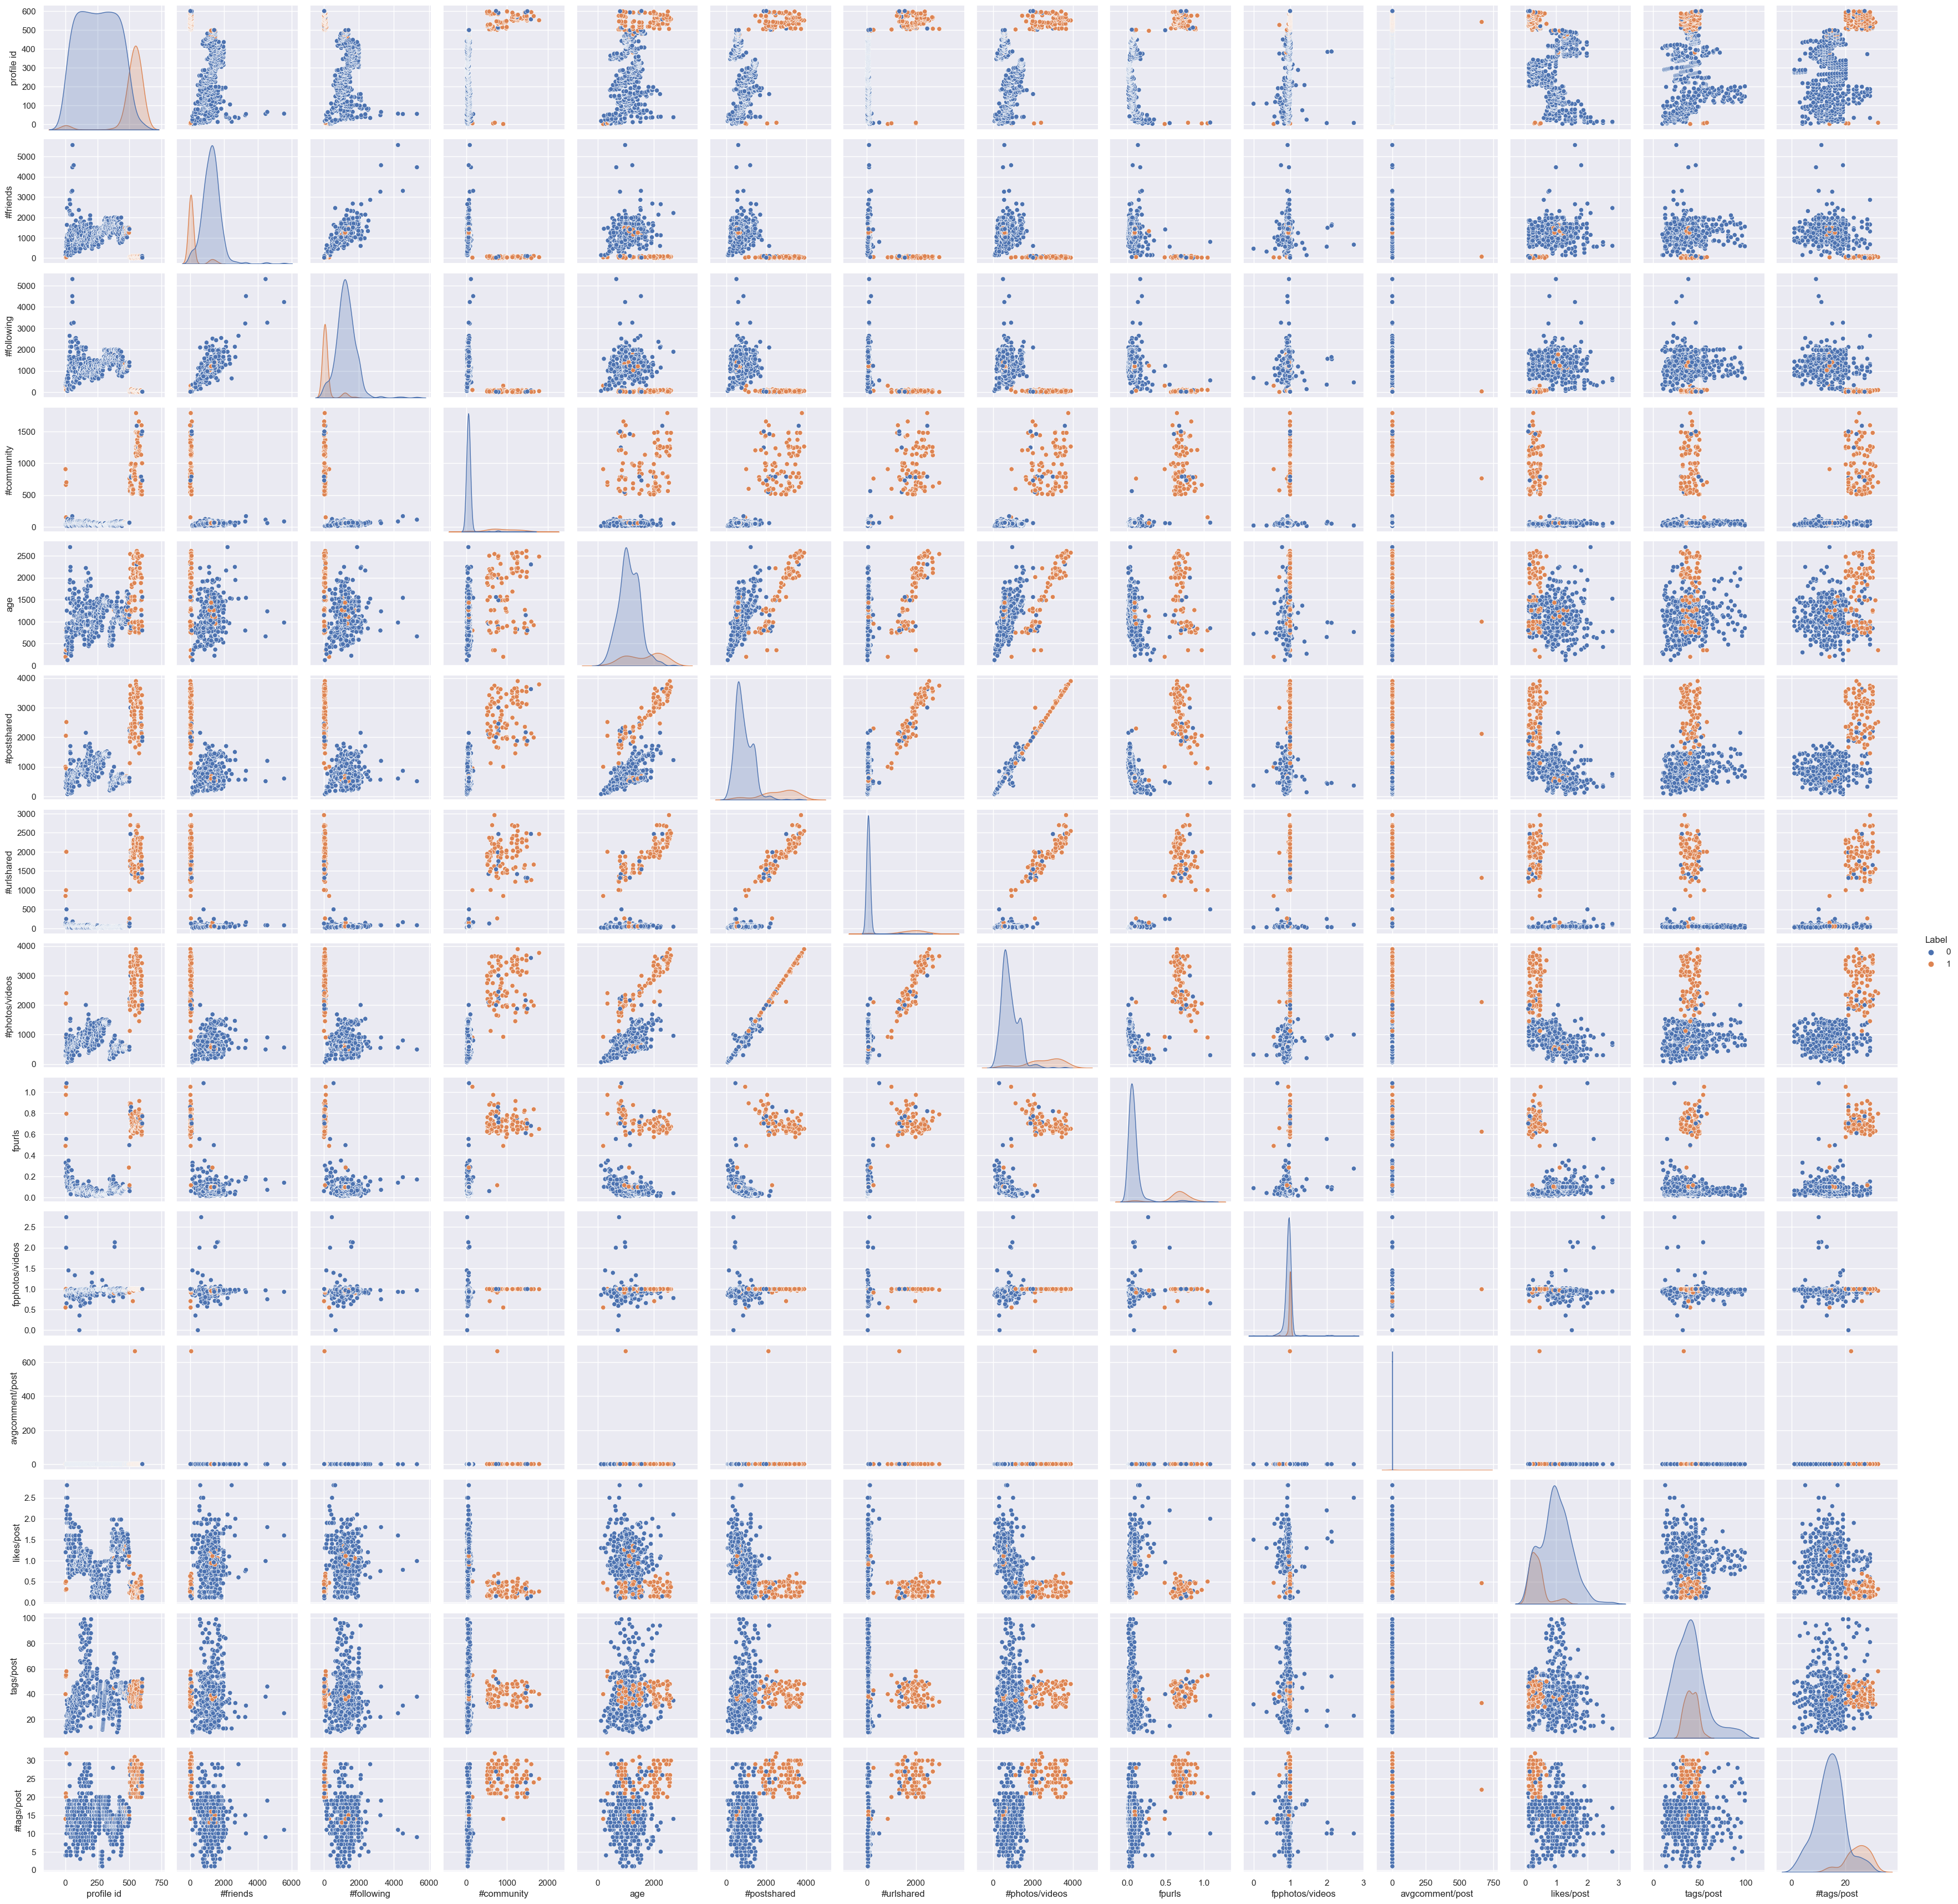

In [78]:
sns.set()
sns.pairplot(data=data, hue='Label')

### Data Preparation for Machine Learning Implementation
* Feature Scaling (Normalization or Standardization)
* Removal of correlated independent variables (Multicorrelated Variable)
* Outlier removal
* Target balancing

**Feature Scaling**<br>
Technique for standardizing the independent characteristics included in data within a specific range. It is used during data pre-processing to deal with drastically changing magnitudes, values, or units. If feature scaling is not performed, a machine learning algorithm will tend to weight bigger values as higher and consider smaller values as lower, regardless of the unit of measurement. <br>

>`Normalization` is used when the data doesn't have Gaussian distribution <br>
>whereas `Standardization` is used on data having Gaussian distribution.

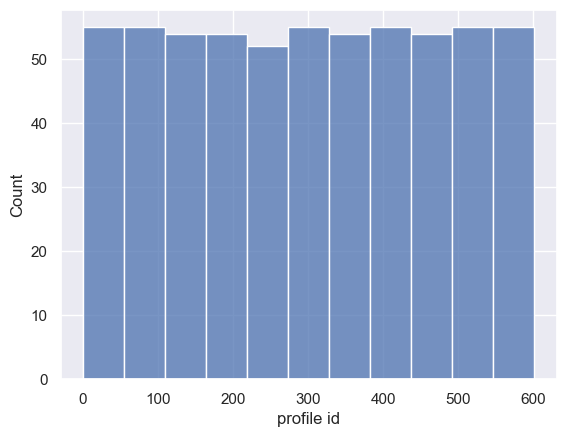

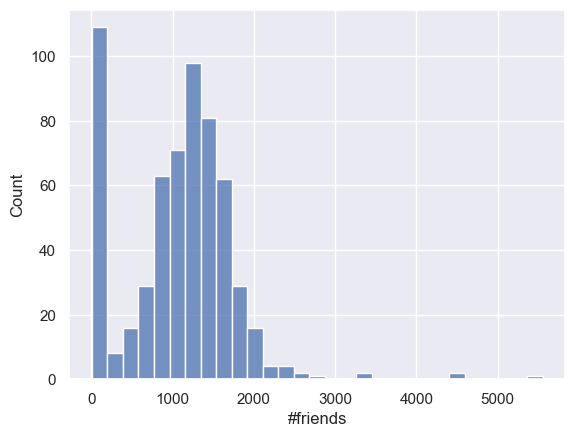

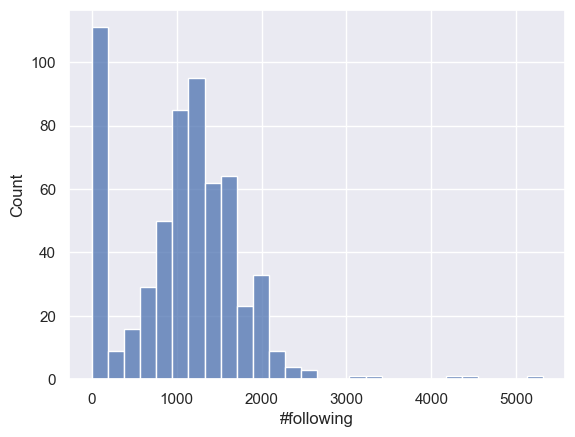

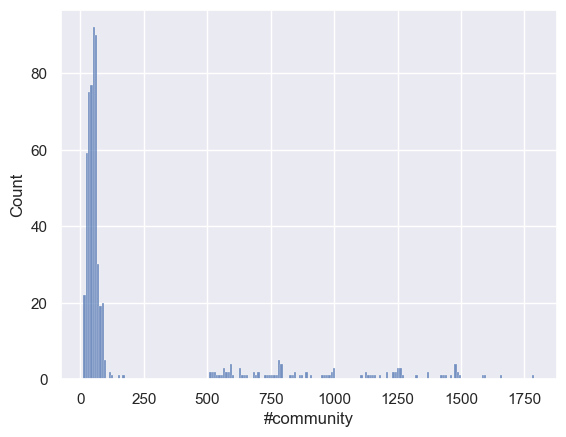

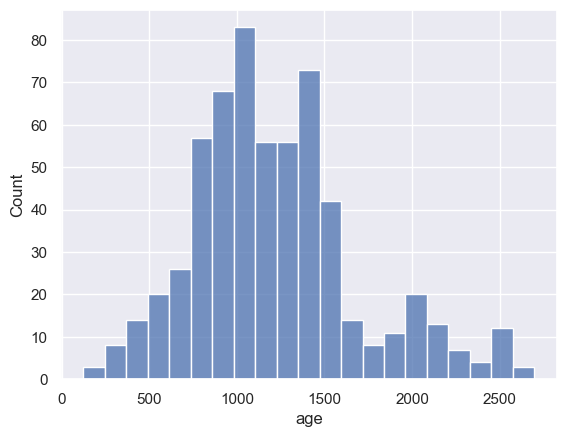

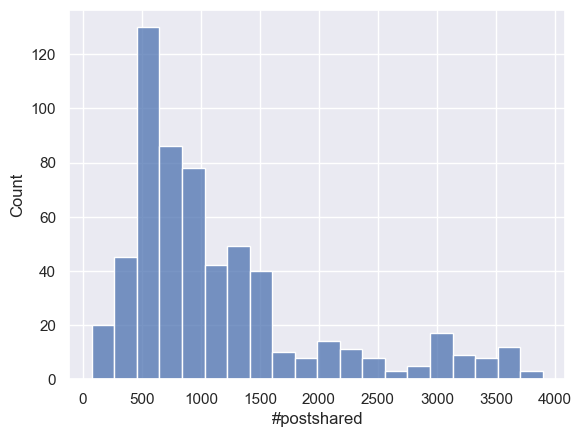

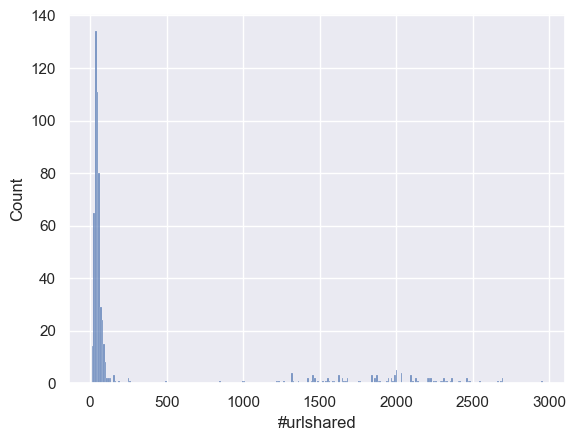

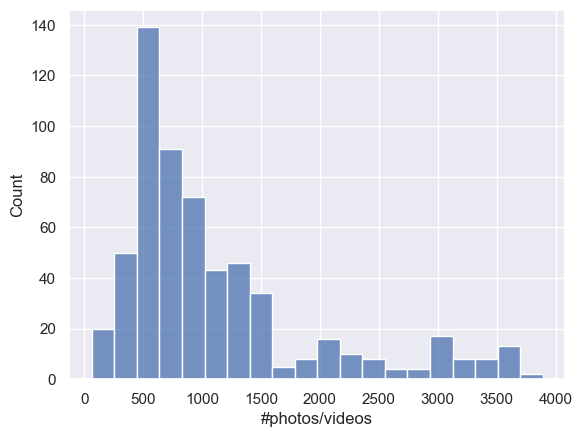

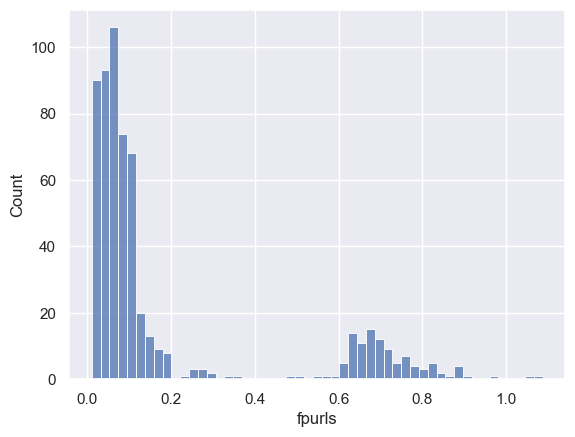

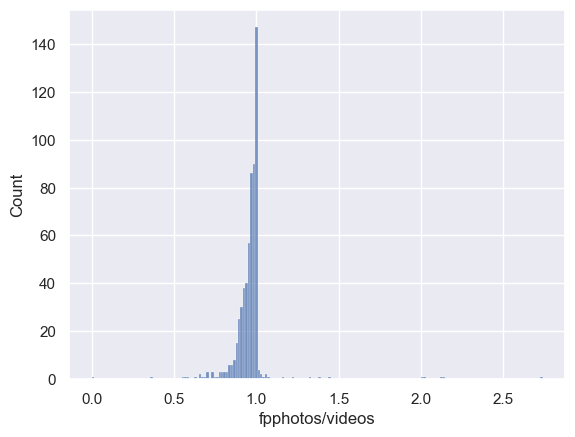

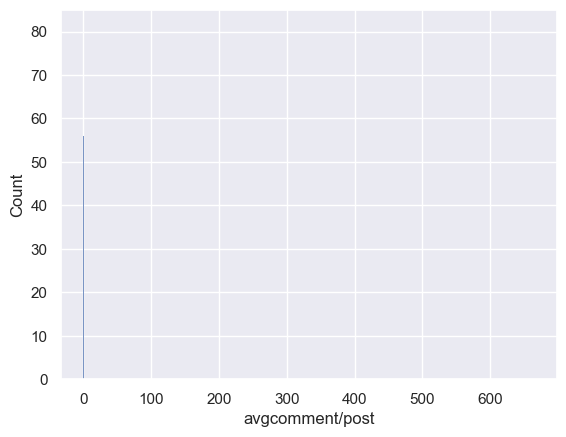

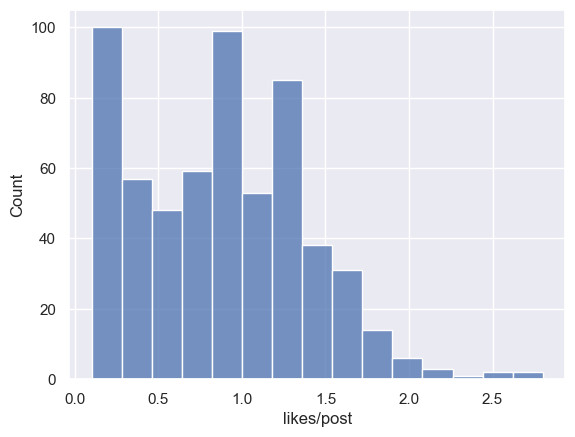

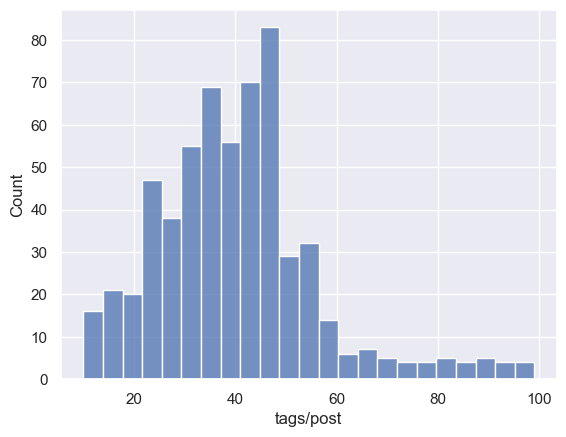

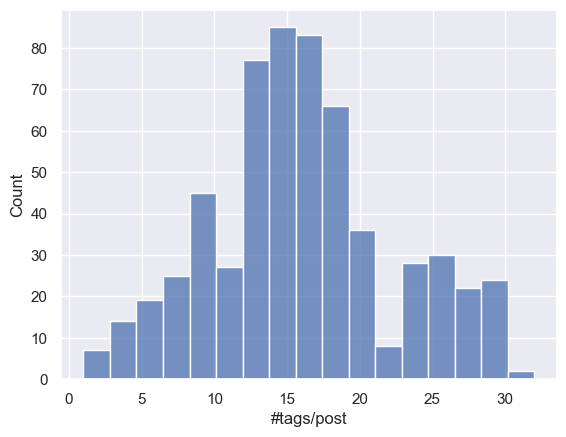

In [82]:
for i in data.iloc[:,:-1]:
    sns.histplot(data[i])
    plt.show();

*Since most variables don't follow a normal distribution curve, we will use the normalization feature scaling technique*

In [165]:
from sklearn.preprocessing import MinMaxScaler
# Library for normalizing a data

In [166]:
scaling_example = pd.DataFrame({'age':[20,50,76,23,35,43,21,27,76,18], 
                                'weight':[55.2,58.3,52.4,51.4,53.2,54.3,55.8,51.9,57.2,49.0]})
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(scaling_example)

display(scaling_example)
display(pd.DataFrame(scaled_data, columns=['age', 'weight']))

age  weight
0   20    55.2
1   50    58.3
2   76    52.4
3   23    51.4
4   35    53.2
5   43    54.3
6   21    55.8
7   27    51.9
8   76    57.2
9   18    49.0

age    weight
0  0.034483  0.666667
1  0.551724  1.000000
2  1.000000  0.365591
3  0.086207  0.258065
4  0.293103  0.451613
5  0.431034  0.569892
6  0.051724  0.731183
7  0.155172  0.311828
8  1.000000  0.881720
9  0.000000  0.000000

*We will only scale the independent variables*

In [167]:
X_var = data.iloc[:,1:-1]
# X_var is data dot iundex locate [all_rows, from_1st_column until the last except the origincal_last]
X_var

#friends  #following  #community   age  #postshared  #urlshared  \
0          39         300         907   200         1000         850   
1         150         350          30   300          300         100   
2         300         450          50   465          500         150   
3          25         110         660   350         2050        2000   
4          24         100         150   800          950        1000   
..        ...         ...         ...   ...          ...         ...   
593        83          29         510  2000         2994        1876   
594        93          28         563  2500         3420        2364   
595        33          27        1000   900         1945        1520   
596       100          26        1500   800         1876        1320   
597        25          17         730  1560         2002        1546   

     #photos/videos    fpurls  fpphotos/videos  avgcomment/post  likes/post  \
0               922  0.490000         0.550000            0.560       0.470   
1               290  0.330000         0.960000            0.500       1.200   
2               450  0.200000         0.840000            0.400       1.500   
3              2050  0.975610         1.000000            0.700       0.300   
4               900  1.052632         0.947368            0.660       0.500   
..              ...       ...              ...              ...         ...   
593            2990  0.626587         0.998664            0.768       0.154   
594            3415  0.691228         0.998538            0.659       0.165   
595            1936  0.781491         0.995373            0.999       0.122   
596            1874  0.703625         0.998934            1.000       0.102   
597            2000  0.772228         0.999001            0.800       0.150   

     tags/post  #tags/post  
0           40          14  
1           10           4  
2           15           7  
3           54          21  
4           55          20  
..         ...         ...  
593         49          26  
594         47          25  
595         45          23  
596         46          21  
597         52          27  

[598 rows x 13 columns]

In [168]:
data_scaled = scaler.fit_transform(X_var)
X = pd.DataFrame(data_scaled, columns=[i for i in data.iloc[:,1:-1]])
y = data['Label']

pd.concat([X,y], axis=1)

#friends  #following  #community       age  #postshared  #urlshared  \
0    0.006306    0.056298    0.503658  0.029160     0.241885    0.284890   
1    0.026306    0.065713    0.010129  0.068040     0.058639    0.030221   
2    0.053333    0.084542    0.021384  0.132193     0.110995    0.047199   
3    0.003784    0.020523    0.364660  0.087481     0.516754    0.675382   
4    0.003604    0.018641    0.077659  0.262442     0.228796    0.335823   
..        ...         ...         ...       ...          ...         ...   
593  0.014234    0.005272    0.280248  0.729005     0.763874    0.633277   
594  0.016036    0.005084    0.310073  0.923406     0.875393    0.798981   
595  0.005225    0.004895    0.555993  0.301322     0.489267    0.512394   
596  0.017297    0.004707    0.837366  0.262442     0.471204    0.444482   
597  0.003784    0.003013    0.404052  0.557932     0.504188    0.521222   

     #photos/videos    fpurls  fpphotos/videos  avgcomment/post  likes/post  \
0          0.223994  0.445069         0.200750         0.000842    0.136397   
1          0.058808  0.296332         0.350400         0.000752    0.406968   
2          0.100627  0.175484         0.306600         0.000602    0.518162   
3          0.518819  0.896492         0.365000         0.001053    0.073388   
4          0.218244  0.968091         0.345789         0.000992    0.147517   
..              ...       ...              ...              ...         ...   
593        0.764506  0.572040         0.364512         0.001155    0.019274   
594        0.875588  0.632130         0.364466         0.000991    0.023351   
595        0.489022  0.716039         0.363311         0.001502    0.007413   
596        0.472818  0.643654         0.364611         0.001504    0.000000   
597        0.505750  0.707428         0.364635         0.001203    0.017791   

     tags/post  #tags/post  Label  
0     0.337079    0.419355      1  
1     0.000000    0.096774      0  
2     0.056180    0.193548      0  
3     0.494382    0.645161      1  
4     0.505618    0.612903      1  
..         ...         ...    ...  
593   0.438202    0.806452      1  
594   0.415730    0.774194      1  
595   0.393258    0.709677      1  
596   0.404494    0.645161      0  
597   0.471910    0.838710      0  

[598 rows x 14 columns]

**Multicollinearity**<br>
When 2 or more independent variables are closely correlated. <br>
Removing multicollinearity is an essential step before we can interpret the ML model. Multicollinearity is a condition where a predictor variable correlates with another predictor. Although multicollinearity doesn't affect the model's performance, it will affect the interpretability.

In [172]:
def most_highly_correlated(mydataframe, numtoreport):
    cormatrix = mydataframe.corr()
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)\

correlations = most_highly_correlated(X, 10)
correlations

FirstVariable  SecondVariable  Correlation
0     #postshared  #photos/videos     0.993537
1      #urlshared          fpurls     0.927552
2      #urlshared  #photos/videos     0.901929
3      #community      #urlshared     0.901116
4        #friends      #following     0.896635
5     #postshared      #urlshared     0.895336
6      #community          fpurls     0.868795
7      #community  #photos/videos     0.808597
8      #community     #postshared     0.799843
9  #photos/videos          fpurls     0.739879

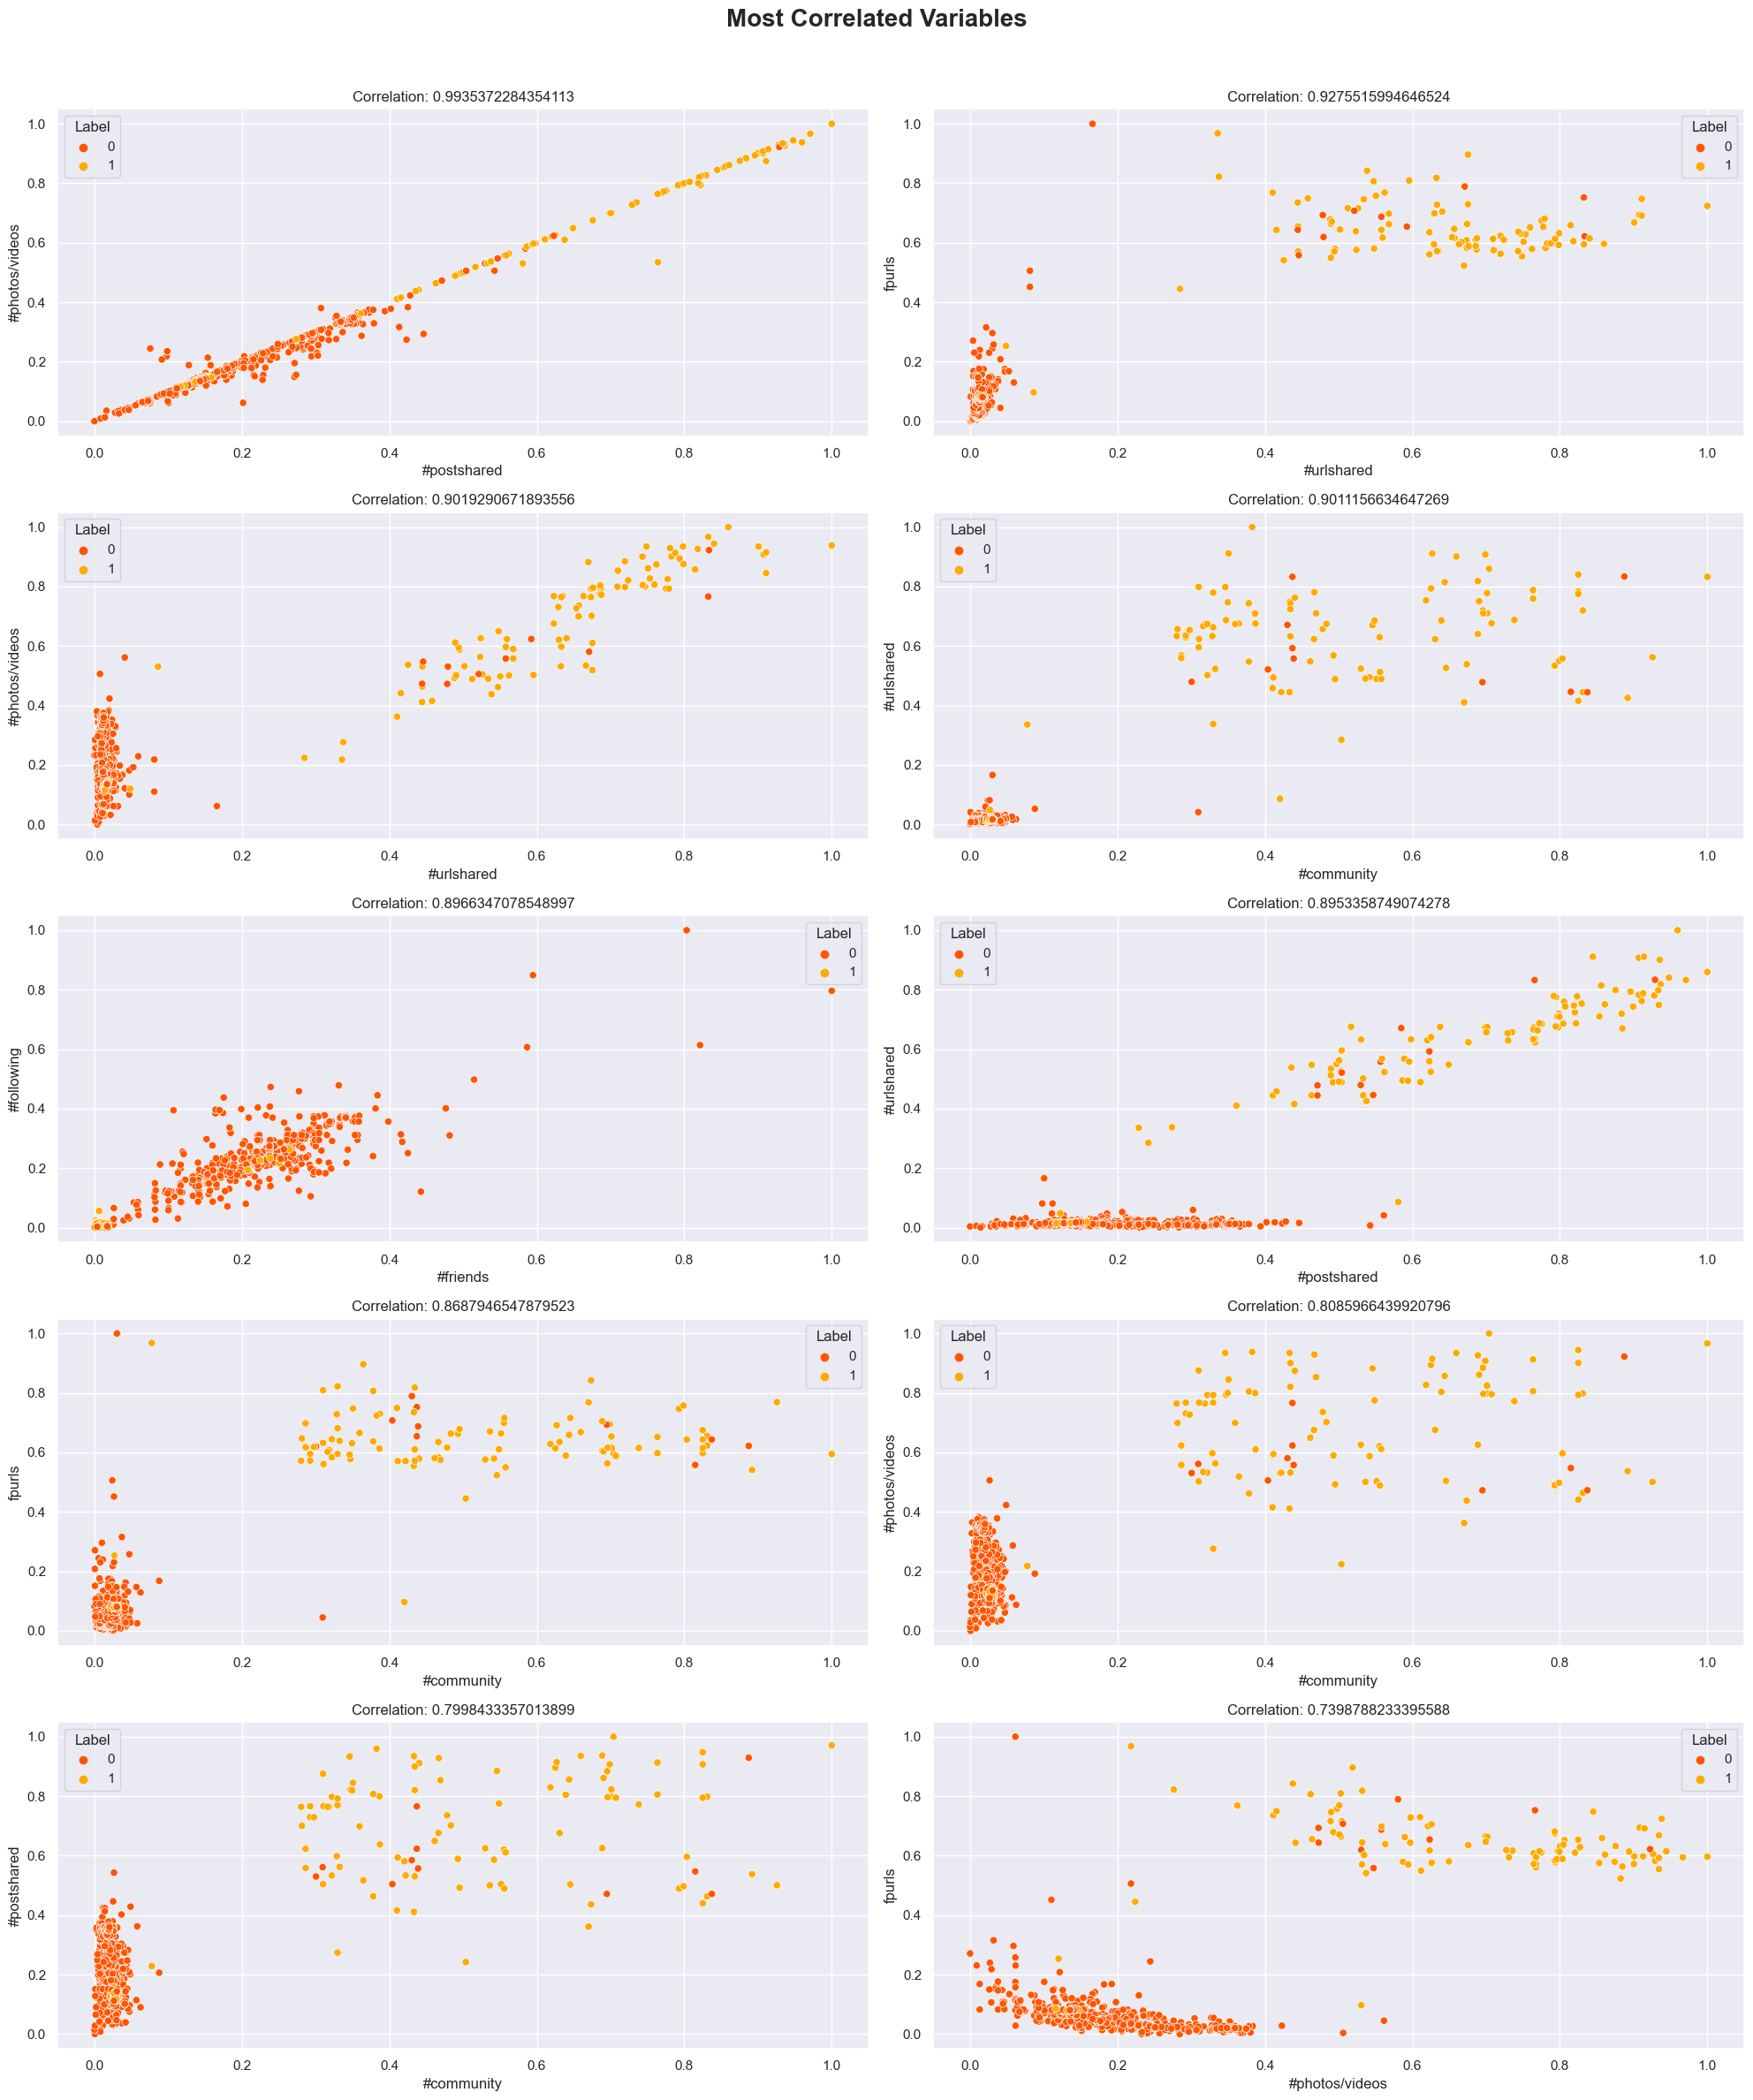

In [174]:
corrs, ax = plt.subplots(5, 2, figsize=(20,25))

c = 0
for i in range(5):
    for j in range(2):
        sns.scatterplot(x=X[correlations.iloc[c,:-1].values[0]], 
                        y=X[correlations.iloc[c,:-1].values[1]], 
                        hue=y, 
                        ax=ax[i,j], 
                        palette='autumn')
        ax[i,j].set_title(f"Correlation: {correlations['Correlation'][c]}")
        c+=1

corrs.tight_layout(rect=[0, 0.03, 1, 0.95])
corrs.suptitle("Most Correlated Variables", fontsize=20, fontweight='bold');

*`#postshared` and `#photos/videos` are both independent variable and they are closely correlated, so we drop either of these 2.*

In [175]:
X = X.drop(['#postshared'],axis=1)

**Target Balancing** <br>
Imbalanced classification is the problem of classification when there is an unequal distribution of classes in the training dataset.
The imbalance in the class distribution may vary, but a severe imbalance is more challenging to model and may require specialized techniques.
Many real-world classification problems have an imbalanced class distribution, such as fraud detection, spam detection, and churn prediction.

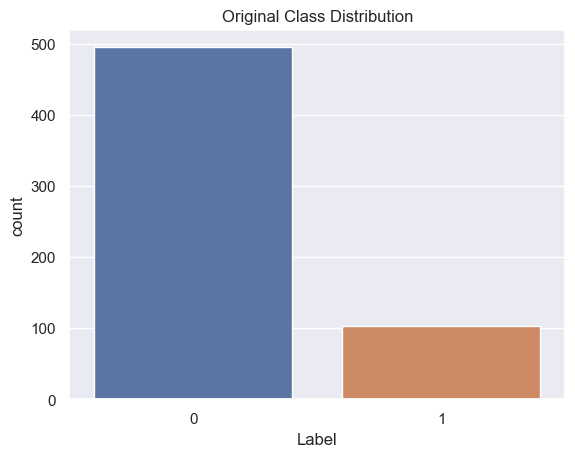

In [211]:
f1 = sns.countplot(x=data['Label'])
f1.set_title('Original Class Distribution');

*There is a severe imbalance in our classes.*
*There are many techniques for treating imbalanced class, most common is the SMOTE over sampling technique.*

In [199]:
from imblearn.over_sampling import SMOTE
# library for getting the oversampler function.

#friends  #following  #community       age  #urlshared  #photos/videos  \
0    0.006306    0.056298    0.503658  0.029160    0.284890        0.223994   
1    0.026306    0.065713    0.010129  0.068040    0.030221        0.058808   
2    0.053333    0.084542    0.021384  0.132193    0.047199        0.100627   
3    0.003784    0.020523    0.364660  0.087481    0.675382        0.518819   
4    0.003604    0.018641    0.077659  0.262442    0.335823        0.218244   
..        ...         ...         ...       ...         ...             ...   
985  0.008375    0.017685    0.329769  0.760692    0.685700        0.772564   
986  0.009975    0.004923    0.740281  0.874390    0.760125        0.816942   
987  0.245632    0.259136    0.025590  0.487047    0.014923        0.131172   
988  0.007442    0.016055    0.325589  0.779071    0.668743        0.781232   
989  0.005744    0.013696    0.750648  0.935392    0.830041        0.961804   

       fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  \
0    0.445069         0.200750         0.000842    0.136397   0.337079   
1    0.296332         0.350400         0.000752    0.406968   0.000000   
2    0.175484         0.306600         0.000602    0.518162   0.056180   
3    0.896492         0.365000         0.001053    0.073388   0.494382   
4    0.968091         0.345789         0.000992    0.147517   0.505618   
..        ...              ...              ...         ...        ...   
985  0.611637         0.363612         0.001058    0.033765   0.229081   
986  0.644423         0.364789         0.001489    0.143991   0.407874   
987  0.073999         0.341474         0.000719    0.324173   0.346414   
988  0.588806         0.362778         0.001145    0.023237   0.284331   
989  0.596811         0.363560         0.001364    0.136540   0.409637   

     #tags/post  Label  
0      0.419355      1  
1      0.096774      0  
2      0.193548      0  
3      0.645161      1  
4      0.612903      1  
..          ...    ...  
985    0.852183      1  
986    0.632308      1  
987    0.464184      1  
988    0.853853      1  
989    0.692182      1  

[990 rows x 13 columns]

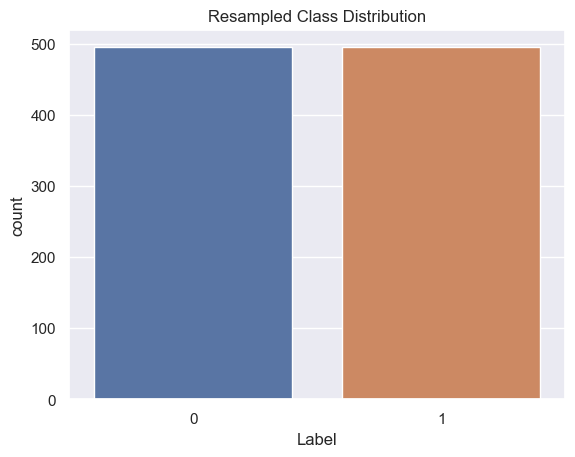

In [210]:
resampler = SMOTE()

resampled_X, resampled_y = resampler.fit_resample(X, y)
display(pd.concat([resampled_X, resampled_y], axis=1))

f2 = sns.countplot(x=resampled_y)
f2.set_title('Resampled Class Distribution');

*Target imbalance also occurs in `Regression Problems`, it occurs when the target variable is not `normally distributed`, so you must normalize the target class prior to machine learning implementation.*

### Machine Learning Implementation (Using Classification Models)
* KNearest Neighbor
* Logistic Regression
* Linear SVC / SVM
* Decision Tree
* Ensemble Learning Models (Gradient Boosting, XGBoosting, Random Forest)

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Model Libraries

from sklearn.model_selection import train_test_split as tts
# For splitting

from sklearn import metrics
# Performance Metrics

#### Steps
<ol>
    <p>1. Split Data</p>
    <p>2. Fit Training Data</p>
    <p>3. Validate Result</p>
    <p>4. Hyperparameter tuning</p>
</ol>

In [313]:
X_train, X_test, y_train, y_test = tts(resampled_X.values, resampled_y.values, random_state=0)
# Split Data

knn_model = KNeighborsClassifier().fit(X_train, y_train)
# Fit training data

knn_model.score(X_test, y_test)
# Validate result

0.9274193548387096

**Confusion Matrix**

In [314]:
y_pred = knn_model.predict(X_test)

display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))

pd.Series(y_test).value_counts()

0    1
0  106   16
1    2  124

1    126
0    122
dtype: int64

In [315]:
pd.DataFrame(np.matrix([['TP', 'FN'], ['FP', 'TN']]), columns=['PP', 'PN'], index=['P', 'N'])

PP  PN
P  TP  FN
N  FP  TN

<center>$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$ </center>

In [316]:
print((106+124) / 248)
print(metrics.accuracy_score(y_test, y_pred))

0.9274193548387096
0.9274193548387096


<center>$ \text{Precision or Positive Predicted Value (PPV)} = \frac{TP}{TP + FP}$ </center>

In [269]:
print(106/(106+2))
print(metrics.precision_score(y_test, y_pred, average=None)[0])

0.9834710743801653
0.9834710743801653


<center>$ \text{Recall or Sensitivity or True Positive Rate (TPR)} = \frac{TP}{TP + FN}$ </center>

In [319]:
print(106/(106+16))
print(metrics.recall_score(y_test, y_pred, average=None)[0])

0.8688524590163934
0.8688524590163934


<center>$ \text{Specificity or True Negative Rate (TNR)} = \frac{TN}{TN + FP}$ </center>

In [318]:
print(124/(124+2))
print(metrics.precision_recall_fscore_support(y_test, y_pred, average='binary')[1])

0.9841269841269841
0.9841269841269841


**Summary**

In [320]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       122
           1       0.89      0.98      0.93       126

    accuracy                           0.93       248
   macro avg       0.93      0.93      0.93       248
weighted avg       0.93      0.93      0.93       248



**Hyperparameter Tuning**

In [323]:
X_train, X_test, y_train, y_test = tts(resampled_X.values, resampled_y.values, random_state=0)

train_accuracy = []
test_accuracy = []
neighbor_setting = range(1,31)

for n in neighbor_setting:
    clf_model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    train_accuracy.append(clf_model.score(X_train, y_train))
    test_accuracy.append(clf_model.score(X_test, y_test))

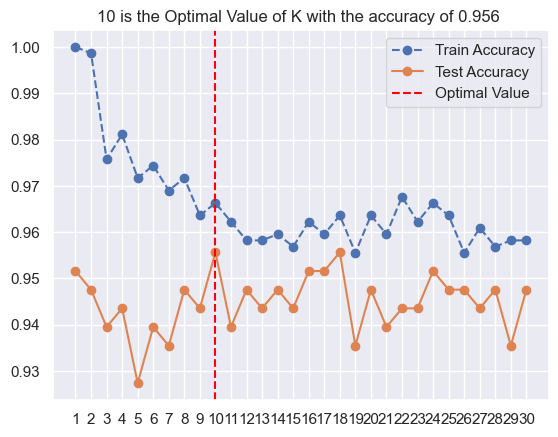

In [324]:
plt.plot(train_accuracy, '--o', label='Train Accuracy')
plt.plot(test_accuracy, '-o', label='Test Accuracy')
plt.axvline(np.argmax(test_accuracy), linestyle='--', color='red', label='Optimal Value')

plt.xticks(ticks=range(len(neighbor_setting)), labels=list(neighbor_setting))
plt.title(f'{np.argmax(test_accuracy)+1} is the Optimal Value of K with the accuracy of {np.round(np.max(test_accuracy),3)} ')
plt.legend();

*Since we already know the optimal value of K, we will then use this value as the parameter for the final model.*

In [325]:
X_train, X_test, y_train, y_test = tts(resampled_X.values, resampled_y.values, random_state=0)
# Split Data

final_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
# Fit training data

final_knn.score(X_test, y_test)
# Validate result

0.9556451612903226

# We now have our Final Model to be used for predicting new values.

In [327]:
X

#friends  #following  #community       age  #urlshared  #photos/videos  \
0    0.006306    0.056298    0.503658  0.029160    0.284890        0.223994   
1    0.026306    0.065713    0.010129  0.068040    0.030221        0.058808   
2    0.053333    0.084542    0.021384  0.132193    0.047199        0.100627   
3    0.003784    0.020523    0.364660  0.087481    0.675382        0.518819   
4    0.003604    0.018641    0.077659  0.262442    0.335823        0.218244   
..        ...         ...         ...       ...         ...             ...   
593  0.014234    0.005272    0.280248  0.729005    0.633277        0.764506   
594  0.016036    0.005084    0.310073  0.923406    0.798981        0.875588   
595  0.005225    0.004895    0.555993  0.301322    0.512394        0.489022   
596  0.017297    0.004707    0.837366  0.262442    0.444482        0.472818   
597  0.003784    0.003013    0.404052  0.557932    0.521222        0.505750   

       fpurls  fpphotos/videos  avgcomment/post  likes/post  tags/post  \
0    0.445069         0.200750         0.000842    0.136397   0.337079   
1    0.296332         0.350400         0.000752    0.406968   0.000000   
2    0.175484         0.306600         0.000602    0.518162   0.056180   
3    0.896492         0.365000         0.001053    0.073388   0.494382   
4    0.968091         0.345789         0.000992    0.147517   0.505618   
..        ...              ...              ...         ...        ...   
593  0.572040         0.364512         0.001155    0.019274   0.438202   
594  0.632130         0.364466         0.000991    0.023351   0.415730   
595  0.716039         0.363311         0.001502    0.007413   0.393258   
596  0.643654         0.364611         0.001504    0.000000   0.404494   
597  0.707428         0.364635         0.001203    0.017791   0.471910   

     #tags/post  
0      0.419355  
1      0.096774  
2      0.193548  
3      0.645161  
4      0.612903  
..          ...  
593    0.806452  
594    0.774194  
595    0.709677  
596    0.645161  
597    0.838710  

[598 rows x 12 columns]

In [328]:
new_data = np.array([[0.003784, 0.005084, 0.404052, 0.087481, 0.633277, 0.505750, 0.643654, 0.345789, 0.001053, 0.147517, 0.000000, 0.709677]])

In [329]:
new_data

array([[0.003784, 0.005084, 0.404052, 0.087481, 0.633277, 0.50575 ,
        0.643654, 0.345789, 0.001053, 0.147517, 0.      , 0.709677]])

In [330]:
final_knn.predict(new_data)

array([1], dtype=int64)

In [331]:
final_knn.predict_proba(new_data)

array([[0.2, 0.8]])

# We can use other models directly

In [351]:
def train_model(model, X, y):
    X_train, X_test, y_train, y_test = tts(X.values, y.values, random_state=0)
    clf = model.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
    return clf

In [375]:
model1 = train_model(KNeighborsClassifier(n_neighbors=10), resampled_X, resampled_y)
model1.predict_proba(new_data)

0.9556451612903226


array([[0.2, 0.8]])

In [380]:
model2 = train_model(DecisionTreeClassifier(random_state=0), resampled_X, resampled_y)
model3 = train_model(RandomForestClassifier(random_state=0), resampled_X, resampled_y)
model4 = train_model(XGBClassifier(random_state=0), resampled_X, resampled_y)

0.9475806451612904
0.9717741935483871
0.9556451612903226


# Feature Importance

<AxesSubplot:>

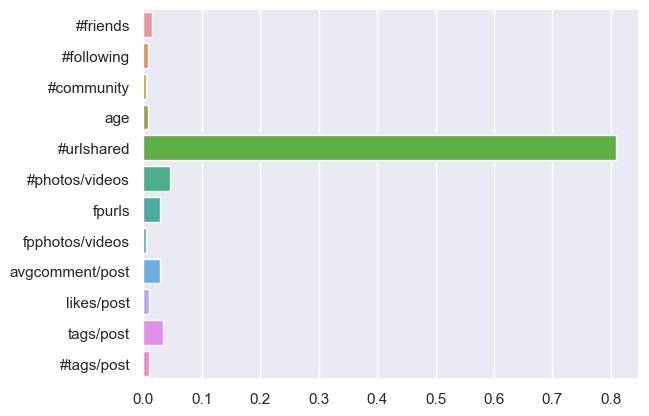

In [381]:
sns.barplot(x=model2.feature_importances_, y=resampled_X.columns)

<AxesSubplot:>

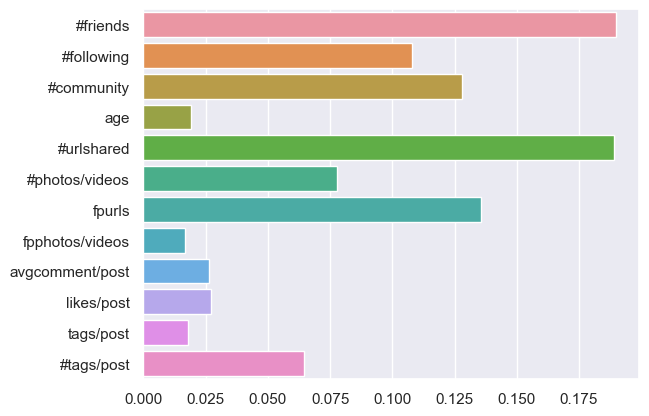

In [385]:
sns.barplot(x=model3.feature_importances_, y=resampled_X.columns)

# SHAP

<AxesSubplot:>

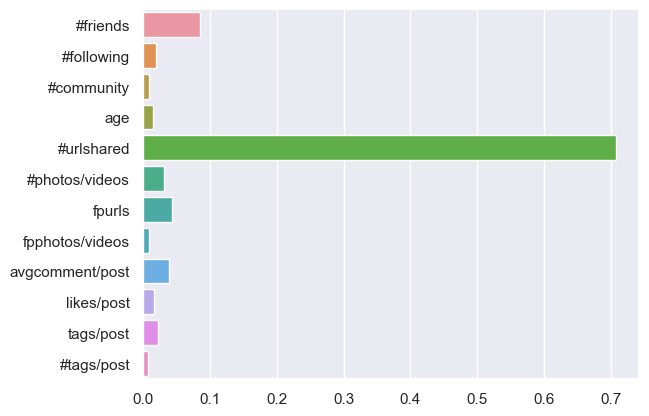

In [384]:
sns.barplot(x=model4.feature_importances_, y=resampled_X.columns)

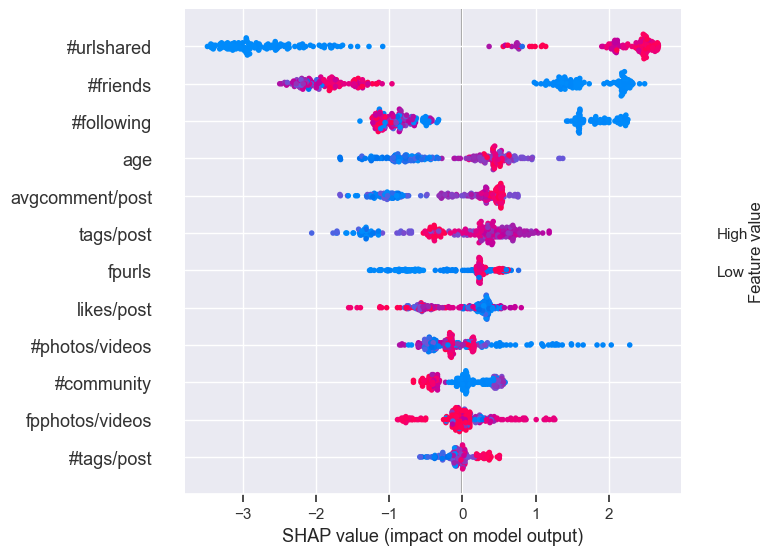

In [383]:
import shap

X_train, X_test, y_train, y_test = tts(resampled_X, resampled_y, random_state=0)
explainer = shap.TreeExplainer(model4, X_test)

values = explainer.shap_values(X_test, check_additivity=False)
shap.summary_plot(values, X_test)